# 공분산과 상관계수

## 표본공분산(Sample covariance)

$${s_{xy}}=\frac{1}{N}\Sigma({x_i}-\hat{x})({y_i}-\hat{y})$$

## 표본상관계수(Sample correlation coefficient)

공분산에 각각의 표준편차 값으로 나눈 값   
각각의 표준편차를 나눠 주는 이유 자료 분포의 방향성만 분리해서 보기 위함과 표준화를 하기 위함

$${r_{xy}} = \frac{{s_{xy}}}{({s_x^2}{x_y^2})^{1/2}}$$

In [4]:
!pip install scikit-learn


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
!pip install koreanize-matplotlib


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
from sklearn.datasets import load_iris
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [7]:
X = load_iris()
load_iris().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
load_iris().feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
# X.data는 iris의 데이터 밸류값이 정리되어 있음,
# X.feature_names 에 각각의 컬럼 이름이 정의되 있음
# X.feature의 순서에 따라서 해당되는 데이터를 가져오는 코드
sepal_length = X.data[:,0]
sepal_width = X.data[:,1]
petal_length = X.data[:,2]
petal_width = X.data[:,3]
sp.stats.pearsonr(sepal_length, petal_length)[0]

0.8717537758865832

In [10]:
np_array = np.random.rand(5,7)
print(np_array)
np_array[:, 0]

[[0.58184039 0.90519497 0.15372888 0.49579831 0.8769452  0.35725305
  0.78556328]
 [0.70116933 0.83016595 0.11144702 0.90909652 0.19069532 0.32074679
  0.20942593]
 [0.78835914 0.55196566 0.31518232 0.01054895 0.2301973  0.46024079
  0.91637199]
 [0.89313184 0.61350147 0.15852919 0.17253761 0.82816562 0.39733074
  0.4286478 ]
 [0.76597864 0.38098597 0.36387095 0.2941992  0.30423305 0.37590457
  0.33774027]]


array([0.58184039, 0.70116933, 0.78835914, 0.89313184, 0.76597864])

## 상관계수 Scatter Plot


피어슨 상관계수의 경우 선형적인 관계만을 측정하기 때문에 선형적이 않으면서 관계가 있는 데이터의 경우에 피어슨 상관계수는 0

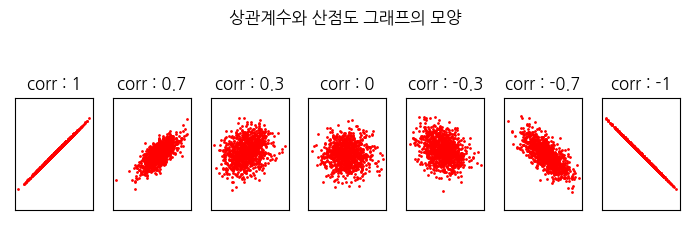

In [11]:
np.random.seed(0)
corrs = [1, 0.7, 0.3, 0, -0.3, -0.7, -1]
plt.figure(figsize=(len(corrs) , 2))
for i, r in enumerate(corrs):
  x, y, = np.random.multivariate_normal([0,0], [[1, r],[r, 1]], 1000).T
  plt.subplot(1, len(corrs), i + 1)
  plt.plot(x,y, 'ro', ms=1)
  plt.axis('equal')
  plt.xticks([])
  plt.yticks([])
  plt.title(f'corr : {r}')

plt.suptitle('상관계수와 산점도 그래프의 모양', y=1.1)
plt.tight_layout()
plt.show()


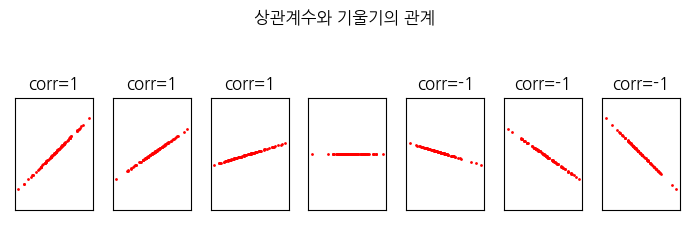

In [12]:
# 랜덤 요소 제거
np.random.seed(1)
# 기울기 설정
slops = [1, 0.7, 0.3, 0, -0.3, -0.7, -1]
# 그래프 설정
plt.figure(figsize=(len(slops),2))
for i, s in enumerate(slops):
  # 서브플롯 배경 그리기
  plt.subplot(1, len(slops), i + 1)
  # 다변수 표준정규분포
  x, y = np.random.multivariate_normal([0,0], [[1,1], [1,1]], 100).T
  # 기울기변경
  y2 = s * y
  # 데이터 플롯 그리기
  plt.plot(x, y2, 'ro', ms=1)
  # y값과 x값의 범위를 맞춰줌
  plt.axis('equal')
  # 특정된 x나 y값을 표현하는건데 지금은 아무것도 표현하지 않도록 설정
  # 만약 아무것도 안주면 자동으로 생성하기 때문에 [] 인자 전달
  plt.xticks([])
  plt.yticks([])
  if s > 0:
    # 서브플롯의 제목
    plt.title('corr=1')
  elif s < 0:
    plt.title('corr=-1')
# 플롯의 대제목
plt.suptitle('상관계수와 기울기의 관계', y=1.1)
# 축의 글자가 겹치지 않도록 layout 설정
plt.tight_layout()
# 그래프 show
plt.show()


### 상관관계 유의점

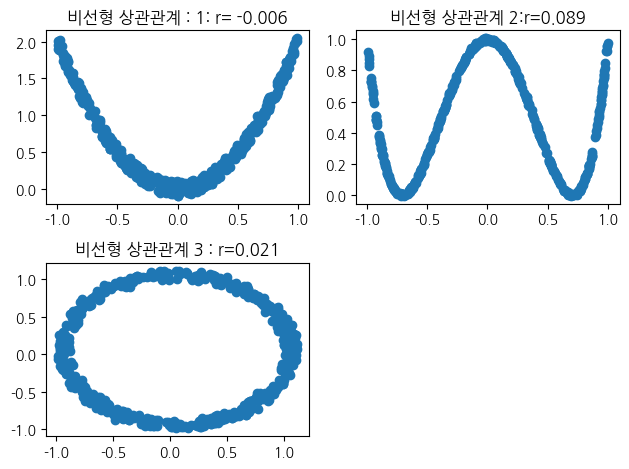

In [13]:
n = 500
np.random.seed(2)

plt.subplot(221)
x1 = np.random.uniform(-1, 1, n)
y1 = 2*x1**2 + np.random.uniform(-0.1, 0.1,n)
plt.scatter(x1,y1)
r1 = sp.stats.pearsonr(x1, y1)[0]
plt.title(f'비선형 상관관계 : 1: r= {r1.round(3)}')

plt.subplot(222)
x2 = np.random.uniform(-1,1, n)
y2 = 4 * (x2**2-0.5)**2 + 0.1 * np.random.uniform(-0.1, 0.1,n)
plt.scatter(x2,y2)
r2 = sp.stats.pearsonr(x2, y2)[0]
plt.title(f'비선형 상관관계 2:r={r2.round(3)}')

plt.subplot(223)
x3 = np.random.uniform(-1,1, n)
y3 = np.cos(x3 * np.pi) + np.random.uniform(0, 1/8, n)
x3 = np.sin(x3 * np.pi) + np.random.uniform(0, 1/8, n)
plt.scatter(x3, y3)
r3 = sp.stats.pearsonr(x3, y3)[0]
plt.title(f'비선형 상관관계 3 : r={r3.round(3)}')
plt.tight_layout()
plt.show()

#### 데이터 분포에 따른 유의점

In [18]:
!pip install statsmodels 
import statsmodels.api as sm
data = sm.datasets.get_rdataset('anscombe')

     ---------------------------------------- 9.1/9.1 MB 6.7 MB/s eta 0:00:00
     -------------------------------------- 233.8/233.8 kB 7.2 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [19]:
df = data.data
df[['x1','y1','x2','y2','x3','y3','x4','y4']]

,x1,y1,x2,y2,x3,y3,x4,y4
0,10,8.04,10,9.14,10,7.46,8,6.58
1,8,6.95,8,8.14,8,6.77,8,5.76
2,13,7.58,13,8.74,13,12.74,8,7.71
3,9,8.81,9,8.77,9,7.11,8,8.84
4,11,8.33,11,9.26,11,7.81,8,8.47
5,14,9.96,14,8.10,14,8.84,8,7.04
6,6,7.24,6,6.13,6,6.08,8,5.25
7,4,4.26,4,3.10,4,5.39,19,12.50
8,12,10.84,12,9.13,12,8.15,8,5.56
9,7,4.82,7,7.26,7,6.42,8,7.91


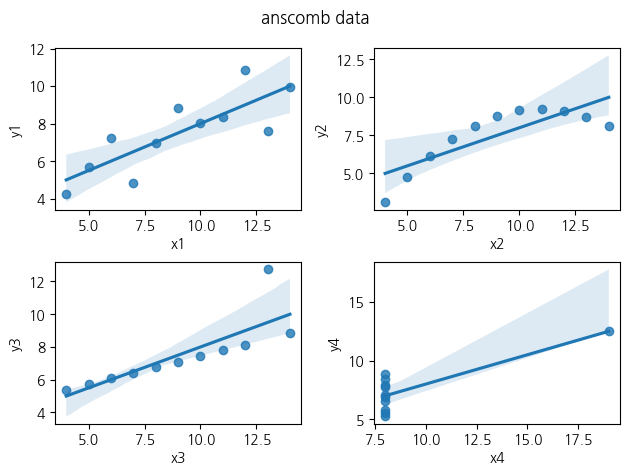

In [20]:
plt.subplot(221)
sns.regplot(x = 'x1', y = 'y1', data=df)
plt.subplot(222)
sns.regplot(x = 'x2', y = 'y2', data=df)
plt.subplot(223)
sns.regplot(x = 'x3', y = 'y3', data=df)
plt.subplot(224)
sns.regplot(x = 'x4', y = 'y4', data=df)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle('anscomb data')
plt.show()


In [21]:
for i in range(1,5):
  print(f'x{i}, y{i} 의 상관계수', sp.stats.pearsonr(df[f'x{i}'], df[f'y{i}'])[0])

x1, y1 의 상관계수 0.81642051634484
x2, y2 의 상관계수 0.8162365060002428
x3, y3 의 상관계수 0.8162867394895982
x4, y4 의 상관계수 0.816521436888503
